# Deep Learning Intro

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Shallow and Deep Networks

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [ ]:
X.shape

In [6]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


### Shallow Model

In [ ]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
results = model.evaluate(X_test, y_test)

In [ ]:
results

In [ ]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

In [ ]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)

### Deep model

In [ ]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

In [ ]:
plot_decision_boundary(model, X, y)

## Multiclass classification

### The Iris dataset

In [ ]:
df = pd.read_csv('../data/iris.csv')

In [ ]:
import seaborn as sns
sns.pairplot(df, hue="species")

In [ ]:
df.head()

In [ ]:
X = df.drop('species', axis=1)
X.head()

In [ ]:
target_names = df['species'].unique()
target_names

In [ ]:
target_dict = {n:i for i, n in enumerate(target_names)}
target_dict

In [ ]:
y= df['species'].map(target_dict)
y.head()

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
y_cat = to_categorical(y)

In [ ]:
y_cat[:10]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,
                                                    test_size=0.2)

In [ ]:
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(lr=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred[:5]

In [ ]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test_class, y_pred_class))

In [ ]:
confusion_matrix(y_test_class, y_pred_class)

## Exercise 1

The [Pima Indians dataset](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) is a very famous dataset distributed by UCI and originally collected from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains data from clinical exams for women age 21 and above of Pima indian origins. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

It has the following features:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)

The last colum is the outcome, and it is a binary variable.

In this first exercise we will explore it through the following steps:

1. Load the ..data/diabetes.csv dataset, use pandas to explore the range of each feature
- For each feature draw a histogram. Bonus points if you draw all the histograms in the same figure.
- Explore correlations of features with the outcome column. You can do this in several ways, for example using the `sns.pairplot` we used above or drawing a heatmap of the correlations.
- Do features need standardization? If so what stardardization technique will you use? MinMax? Standard?
- Prepare your final `X` and `y` variables to be used by a ML model. Make sure you define your target variable well. Will you need dummy columns?

In [2]:
df = pd.read_csv('diabetes.csv')

In [8]:
import seaborn as sns

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020AE2BD52E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000020AE39E5B70>]], dtype=object)

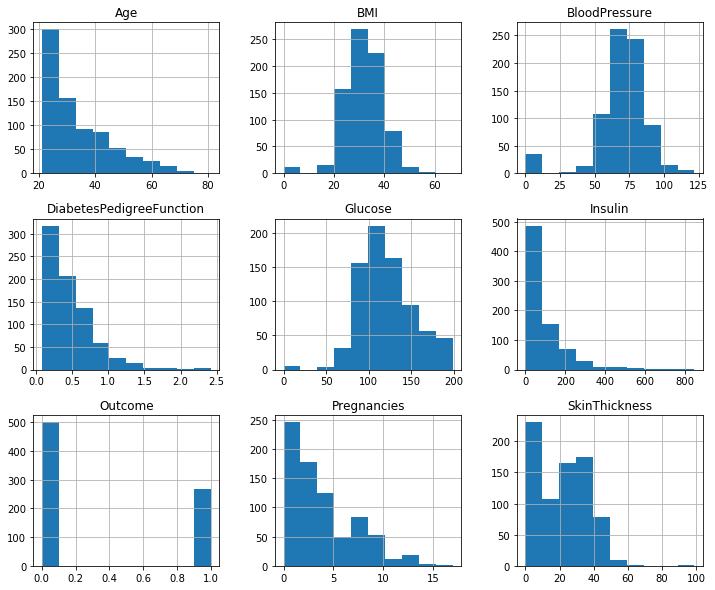

In [14]:
df.hist(figsize=(12, 10))

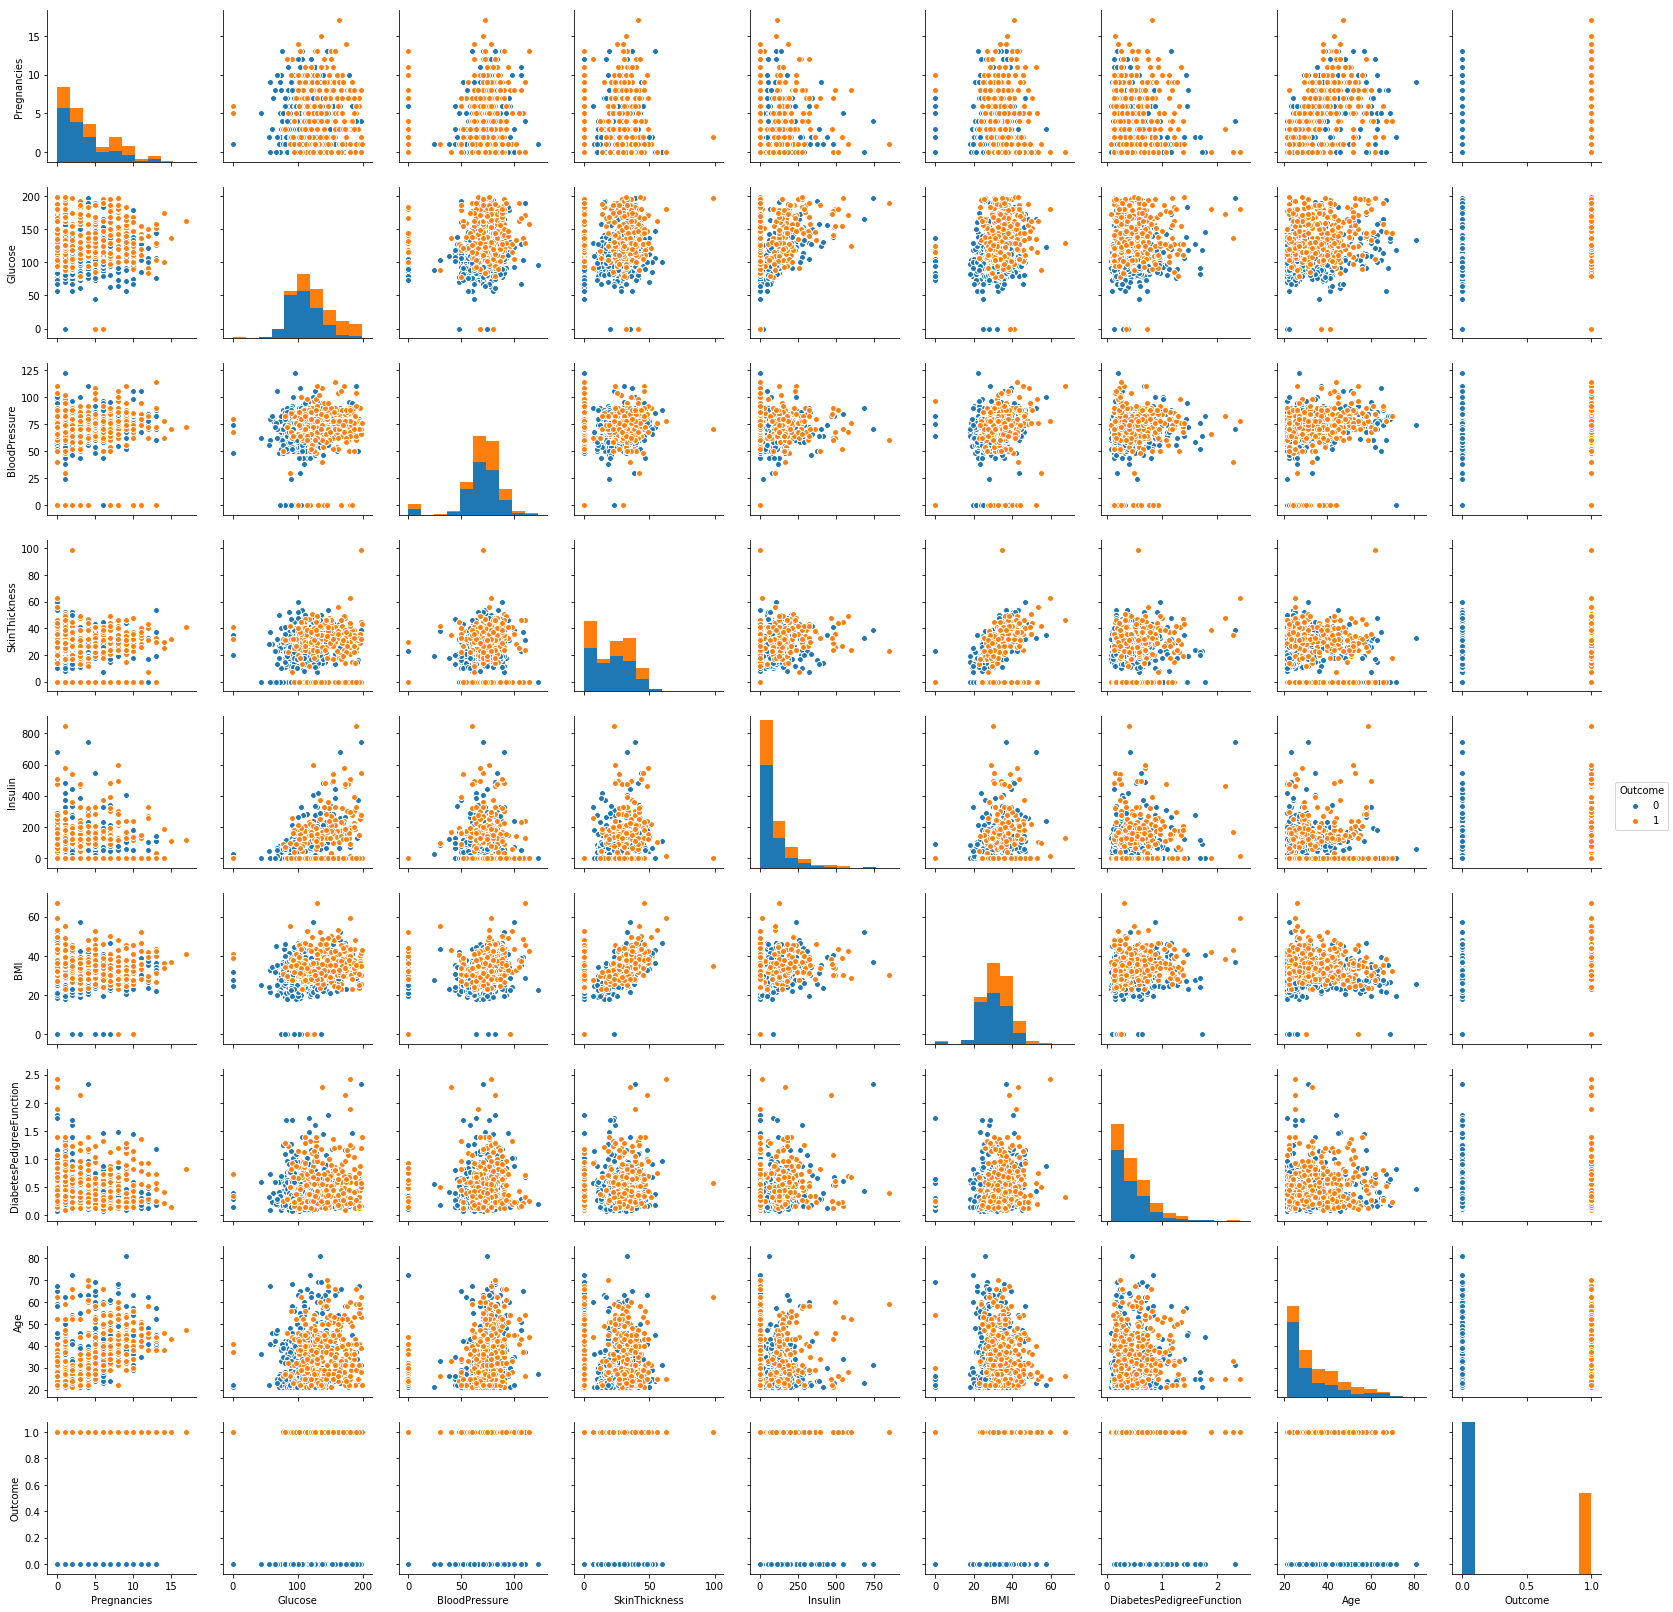

In [15]:
sns.pairplot(df, hue='Outcome')

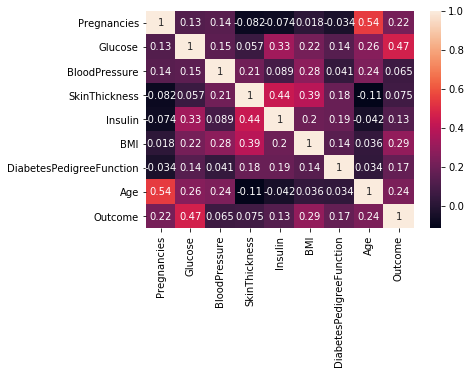

In [16]:
sns.heatmap(df.corr(), annot=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df.drop('Outcome', axis=1))
y = df['Outcome'].values

In [30]:
from keras.utils import to_categorical

y = to_categorical(y)

In [31]:
y

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       ..., 
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.]])

## Exercise 2

Build a fully connected NN model that predicts diabetes. Follow these steps:

1. Split your data in a train/test with a test size of 20% and a `random_state = 22`
- define a sequential model with at least one inner layer. You will have to make choices for the following things:
    - what is the size of the input?
    - how many nodes will you use in each layer?
    - what is the size of the output?
    - what activation functions will you use in the inner layers?
    - what activation function will you use at output?
    - what loss function will you use?
    - what optimizer will you use?
- fit your model on the training set, using a validation_split of 0.1
- test your trained model on the test data from the train/test split
- check the accuracy score, the confusion matrix and the classification report

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [57]:
X_train.shape

(614, 8)

In [58]:
model = Sequential()
model.add(Dense(32, input_dim=8, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [59]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
614/614 [==============================] - 1s 2ms/step - loss: 0.6382 - acc: 0.6401
Epoch 2/200
614/614 [==============================] - 0s 111us/step - loss: 0.5587 - acc: 0.6857
Epoch 3/200
614/614 [==============================] - 0s 161us/step - loss: 0.5030 - acc: 0.7606
Epoch 4/200
614/614 [==============================] - 0s 98us/step - loss: 0.4767 - acc: 0.7834
Epoch 5/200
614/614 [==============================] - 0s 110us/step - loss: 0.4569 - acc: 0.7850
Epoch 6/200
614/614 [==============================] - 0s 111us/step - loss: 0.4550 - acc: 0.7785
Epoch 7/200
614/614 [==============================] - 0s 99us/step - loss: 0.4447 - acc: 0.7932
Epoch 8/200
614/614 [==============================] - 0s 81us/step - loss: 0.4410 - acc: 0.7899
Epoch 9/200
614/614 [==============================] - 0s 87us/step - loss: 0.4378 - acc: 0.7915
Epoch 10/200
614/614 [==============================] - 0s 143us/step - loss: 0.4341 - acc: 0.7980
Epoch 11/200
614/614 [===

614/614 [==============================] - 0s 75us/step - loss: 0.2436 - acc: 0.9023
Epoch 85/200
614/614 [==============================] - 0s 90us/step - loss: 0.2390 - acc: 0.8990
Epoch 86/200
614/614 [==============================] - 0s 89us/step - loss: 0.2347 - acc: 0.9104
Epoch 87/200
614/614 [==============================] - 0s 70us/step - loss: 0.2331 - acc: 0.9088
Epoch 88/200
614/614 [==============================] - 0s 83us/step - loss: 0.2318 - acc: 0.9121
Epoch 89/200
614/614 [==============================] - 0s 99us/step - loss: 0.2317 - acc: 0.9121
Epoch 90/200
614/614 [==============================] - 0s 85us/step - loss: 0.2287 - acc: 0.9104
Epoch 91/200
614/614 [==============================] - 0s 107us/step - loss: 0.2241 - acc: 0.9153
Epoch 92/200
614/614 [==============================] - 0s 75us/step - loss: 0.2242 - acc: 0.9137
Epoch 93/200
614/614 [==============================] - 0s 92us/step - loss: 0.2217 - acc: 0.9153
Epoch 94/200
614/614 [==========

614/614 [==============================] - 0s 72us/step - loss: 0.1055 - acc: 0.9772
Epoch 167/200
614/614 [==============================] - 0s 99us/step - loss: 0.1046 - acc: 0.9707
Epoch 168/200
614/614 [==============================] - 0s 67us/step - loss: 0.1005 - acc: 0.9756
Epoch 169/200
614/614 [==============================] - 0s 71us/step - loss: 0.0987 - acc: 0.9756
Epoch 170/200
614/614 [==============================] - 0s 96us/step - loss: 0.0981 - acc: 0.9788
Epoch 171/200
614/614 [==============================] - 0s 76us/step - loss: 0.0974 - acc: 0.9691
Epoch 172/200
614/614 [==============================] - 0s 68us/step - loss: 0.1104 - acc: 0.9625
Epoch 173/200
614/614 [==============================] - 0s 81us/step - loss: 0.0950 - acc: 0.9821
Epoch 174/200
614/614 [==============================] - 0s 76us/step - loss: 0.0945 - acc: 0.9805
Epoch 175/200
614/614 [==============================] - 0s 103us/step - loss: 0.0910 - acc: 0.9788
Epoch 176/200
614/614 [

In [61]:
y_pred = model.predict(X_test)

In [62]:
y_pred = y_pred.argmax(axis=1)

In [63]:
y_test = y_test.argmax(axis=1)

## Exercise 3
Compare your work with the results presented in [this notebook](https://www.kaggle.com/futurist/d/uciml/pima-indians-diabetes-database/pima-data-visualisation-and-machine-learning). Are your Neural Network results better or worse than the results obtained by traditional Machine Learning techniques?

- Try training a Support Vector Machine or a Random Forest model on the exact same train/test split. Is the performance better or worse?
- Try restricting your features to only 4 features like in the suggested notebook. How does model performance change?

## Exercise 4

[Tensorflow playground](http://playground.tensorflow.org/) is a web based neural network demo. It is really useful to develop an intuition about what happens when you change architecture, activation function or other parameters. Try playing with it for a few minutes. You don't need do understand the meaning of every knob and button in the page, just get a sense for what happens if you change something. In the next chapter we'll explore these things in more detail.
